In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Loading dataset
df = pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv', encoding='latin1', dtype='str')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.shape

(607, 12)

In [4]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    object
 1   work_year           607 non-null    object
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    object
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    object
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    object
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: object(12)
memory usage: 57.0+ KB


In [6]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

Here we can see that we have 318 entries from year 2022, 217 entries from year 2021 and 72 entries from 2020.

In [7]:
len(pd.unique(df['job_title']))

50

In [8]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

There are about 50 job titles in which Data Scientist and Data Engineer are the job titles with maximum no. of employees.

In [9]:
df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

About 280 employees are at Senior-Level, 213 at Junior Mid-Level, 88 at Entry level while 26 employees are at Expert executive level.

In [10]:
df['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

588 employees are Full-Time workers, 10 are Part-time workers, 5 employees are on contract basis whereas 4 work as a Freelancer.

In [11]:
df['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

Majority of companies from our dataset are located in United States.

In [12]:
df['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

About 326 of the companies are Medium sized, 198 large sized whereas 83 small sized companies are there.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

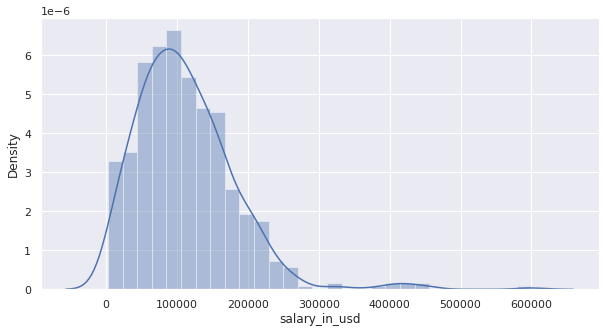

In [13]:
# Visualizing the data using histograms
plt.figure(figsize=(10,5), dpi=None)
sns.set(style='darkgrid')
sns.distplot(df['salary_in_usd'], kde=True)

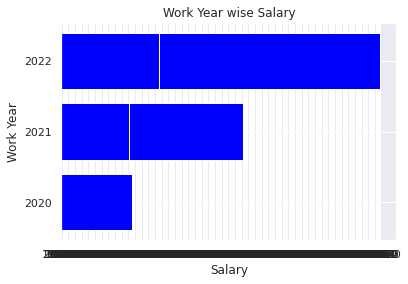

In [14]:
# Salary as per Work_Year of employees 
x = df['work_year']
y = df['salary']
plt.barh(x,y,color='blue')
plt.title('Work Year wise Salary')
plt.xlabel('Salary')
plt.ylabel('Work Year')
plt.show()

<AxesSubplot:ylabel='remote_ratio'>

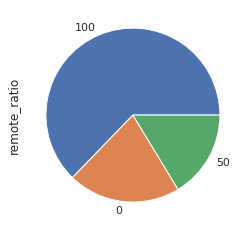

In [15]:
df['remote_ratio'].value_counts().plot(kind='pie')

The pie chart indicates that maximum amount of work has been done remotely whereas No remote work and partially remote work hold equal shares.

<AxesSubplot:>

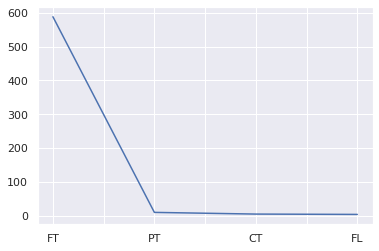

In [16]:
df['employment_type'].value_counts().plot(kind='line')

In [17]:
elname = df['experience_level'].unique()
elsize = df.groupby('experience_level', sort=False).size()
elsize

experience_level
MI    213
SE    280
EN     88
EX     26
dtype: int64

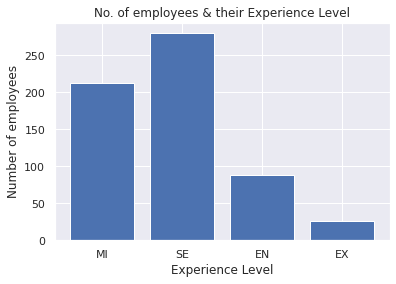

In [18]:
plt.bar(elname, elsize)
plt.xlabel('Experience Level')
plt.ylabel('Number of employees')
plt.title('No. of employees & their Experience Level')
plt.show()

Maximum number of employees are at Intermediate Senior Level in terms of work experience.

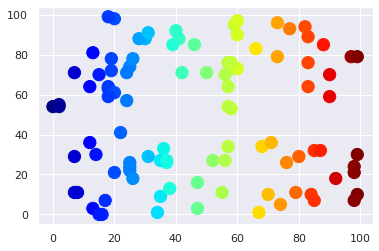

In [19]:
a = np.random.randint(0,100,100)
b = np.random.randint(0,100,100)
plt.scatter(a,b,s=150, c=a, cmap='jet')

<BarContainer object of 607 artists>

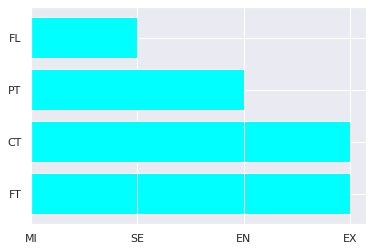

In [20]:
x = df['employment_type']
y = df['experience_level']
plt.barh(x,y,color='cyan')

The above bargraph plottting shows that most of the employees at Expert Executive Level are either Full-Time or Contract based employees.

In [21]:
grafic = px.treemap(df, path=['job_title', 'salary_in_usd'])
grafic.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

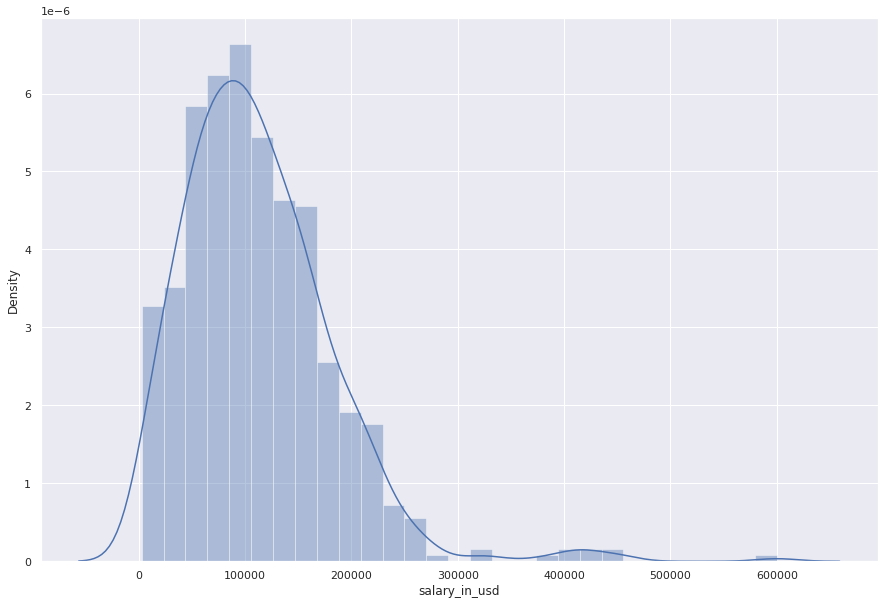

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(df['salary_in_usd'], fit=None)

Text(0.5, 1.0, 'Small Company Locations')

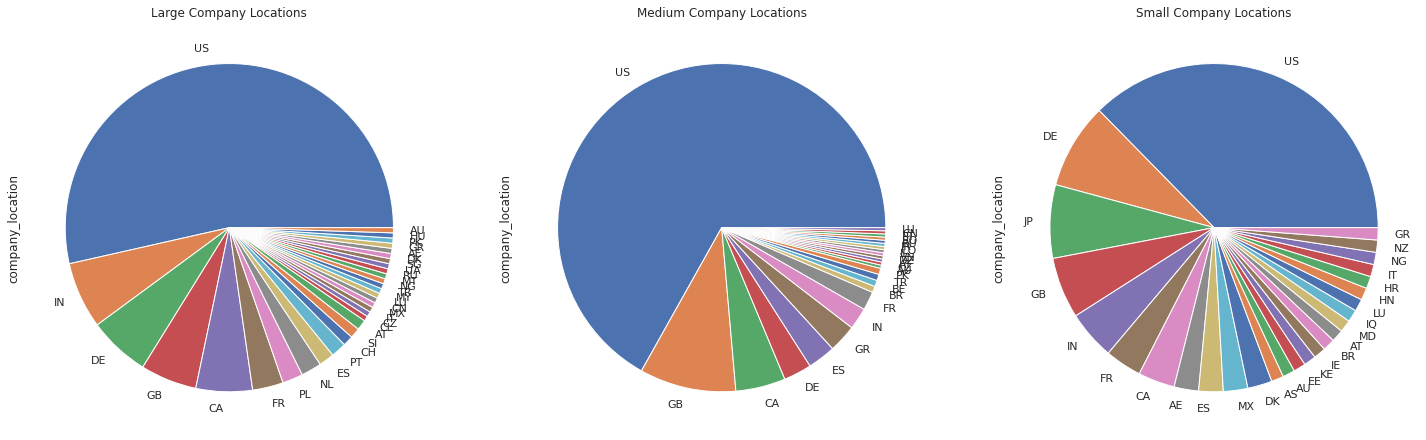

In [23]:
figure, axis = plt.subplots(1, 3,figsize=(25,12))

df.loc[df.company_size=='L'].company_location.value_counts().plot.pie(ax=axis[0])
axis[0].set_title('Large Company Locations')

df.loc[df.company_size=='M'].company_location.value_counts().plot.pie(ax=axis[1])
axis[1].set_title('Medium Company Locations')

df.loc[df.company_size=='S'].company_location.value_counts().plot.pie(ax=axis[2])
axis[2].set_title('Small Company Locations')

<AxesSubplot:xlabel='company_location'>

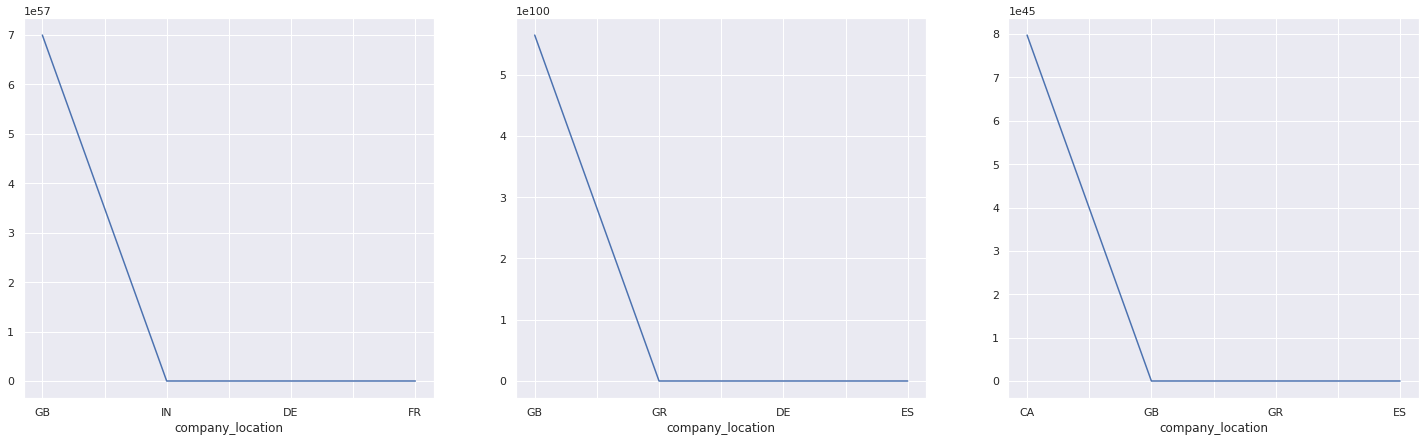

In [24]:
figure, axis = plt.subplots(1, 3,figsize=(25,7))

df.loc[df['job_title']=='Data Scientist'].groupby('company_location').salary_in_usd.mean().sort_values(ascending=False).head(5).plot(ax=axis[0])

df.loc[df['job_title']=='Data Engineer'].groupby('company_location').salary_in_usd.mean().sort_values(ascending=False).head(5).plot(ax=axis[1])

df.loc[df['job_title']=='Data Analyst'].groupby('company_location').salary_in_usd.mean().sort_values(ascending=False).head(5).plot(ax=axis[2])